In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from open3d import *
import copy


In [3]:
ds_path = os.path.abspath('..')
rgb_path = os.path.join(ds_path , "rgb")
depth_path = os.path.join(ds_path , "depth")
img_files = os.listdir(rgb_path)
depth_files = os.listdir(depth_path)
point_Cloud_path = os.path.join(ds_path, "pcl") 


In [7]:
#######Point Cloud Formation

for file in range(0,1540):
    if(len(str(file)) == 1):
        c = str(0)+str(0)+str(0)+str(0)
    elif(len(str(file)) == 2):
        c = str(0)+str(0)+str(0)
    elif(len(str(file)) == 3):
        c = str(0)+str(0)
    else:
        c=str(0)
    color_raw = read_image(rgb_path+"/rgb_"+c+str(file)+".png")
    depth_raw = read_image(depth_path+"/depth_"+c+str(file)+".png")
    rgbd_image = create_rgbd_image_from_color_and_depth(color_raw, depth_raw)
    # print(rgbd_image)
#     plt.subplot(1, 2, 1)
#     plt.title('TUM grayscale image')
#     plt.imshow(rgbd_image.color)
#     plt.subplot(1, 2, 2)
#     plt.title('TUM depth image')
#     plt.imshow(rgbd_image.depth)
#     plt.show()
    pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
# 
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
#     draw_geometries([pcd])
    write_point_cloud(str(file)+".pcd", pcd) 
#     voxel_down_pcd = voxel_down_sample(pcd, voxel_size = 0.02)
    
    


In [4]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    draw_geometries([source_temp, target_temp])


In [19]:
# def preprocess_point_cloud(pcd, voxel_size):
#     print(":: Downsample with a voxel size %.3f." % voxel_size)
#     pcd_down = voxel_down_sample(pcd, voxel_size)

#     radius_normal = voxel_size * 2
#     print(":: Estimate normal with search radius %.3f." % radius_normal)
#     estimate_normals(pcd_down, KDTreeSearchParamHybrid(
#             radius = radius_normal, max_nn = 30))

#     radius_feature = voxel_size * 5
#     print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
#     pcd_fpfh = compute_fpfh_feature(pcd_down,
#             KDTreeSearchParamHybrid(radius = radius_feature, max_nn = 100))
#     return pcd_down, pcd_fpfh


In [18]:
# def prepare_dataset(voxel_size):
#     print(":: Load two point clouds and disturb initial pose.")
#     source = read_point_cloud("0000.pcd")
#     target = read_point_cloud("0001.pcd")
#     trans_init = np.asarray([[0.0, 0.0, 1.0, 0.0],
#                             [1.0, 0.0, 0.0, 0.0],
#                             [0.0, 1.0, 0.0, 0.0],
#                             [0.0, 0.0, 0.0, 1.0]])
#     source.transform(trans_init)
#     draw_registration_result(source, target, np.identity(4))

#     source_down, source_fpfh = preprocess_point_cloud(source, voxel_size)
#     target_down, target_fpfh = preprocess_point_cloud(target, voxel_size)
#     return source, target, source_down, target_down, source_fpfh, target_fpfh


In [17]:
# def execute_global_registration(
#         source_down, target_down, source_fpfh, target_fpfh, voxel_size):
#     distance_threshold = voxel_size * 1.5
#     print(":: RANSAC registration on downsampled point clouds.")
#     print("   Since the downsampling voxel size is %.3f," % voxel_size)
#     print("   we use a liberal distance threshold %.3f." % distance_threshold)
#     result = registration_ransac_based_on_feature_matching(
#             source_down, target_down, source_fpfh, target_fpfh,
#             distance_threshold,
#             TransformationEstimationPointToPoint(False), 4,
#             [CorrespondenceCheckerBasedOnEdgeLength(0.9),
#             CorrespondenceCheckerBasedOnDistance(distance_threshold)],
#             RANSACConvergenceCriteria(4000000, 500))
#     return result


In [8]:
# voxel_size = 0.05
# source, target, source_down, target_down, source_fpfh, target_fpfh = prepare_dataset(voxel_size)
# result_ransac = execute_global_registration(source_down, target_down,source_fpfh, target_fpfh, voxel_size)
# print(result_ransac)
def display_inlier_outlier(cloud, ind):
    inlier_cloud = select_down_sample(cloud, ind)
    outlier_cloud = select_down_sample(cloud, ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    draw_geometries([inlier_cloud, outlier_cloud])


In [13]:
# for file in range(1540):
pcd = read_point_cloud("0.pcd")
draw_geometries([pcd])
print("Downsample the point cloud with a voxel of 0.02")
voxel_down_pcd = voxel_down_sample(pcd, voxel_size = 0.02)
draw_geometries([voxel_down_pcd])
cl,ind = statistical_outlier_removal(voxel_down_pcd,nb_neighbors=20, std_ratio=2.0)
display_inlier_outlier(voxel_down_pcd, ind)
# draw_geometries([cl])
print("Radius oulier removal")
cl,ind = radius_outlier_removal(cl,nb_points=16, radius=0.05)
# display_inlier_outlier(cl, ind)
        

Downsample the point cloud with a voxel of 0.02
Showing outliers (red) and inliers (gray): 
Radius oulier removal
Showing outliers (red) and inliers (gray): 


In [14]:
voxel_size = 0.05

distance_threshold = voxel_size * 1.5
    
source = read_point_cloud("1000.pcd")
target = read_point_cloud("1001.pcd")
source_down = voxel_down_sample(source, 0.05)
target_down = voxel_down_sample(target, 0.05)
estimate_normals(source_down,KDTreeSearchParamHybrid(radius = 0.1, max_nn= 30))
estimate_normals(target_down,KDTreeSearchParamHybrid(radius = 0.1, max_nn= 30))
source_fpfh = compute_fpfh_feature(source_down,KDTreeSearchParamHybrid(radius = 0.25, max_nn= 100))
target_fpfh = compute_fpfh_feature(target_down,KDTreeSearchParamHybrid(radius = 0.25, max_nn= 100))

PointCloud with 162789 points.


In [20]:
result = registration_fast_based_on_feature_matching(
            source_down, target_down, source_fpfh, target_fpfh,
            FastGlobalRegistrationOption(
            maximum_correspondence_distance = distance_threshold))
draw_registration_result(source_down, target_down,result.transformation)
# print(result)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


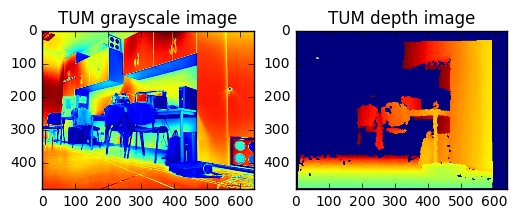

PointCloud with 137978 points.


In [12]:
color_raw = read_image("../rgb/rgb_00000.png")
depth_raw = read_image("../depth/depth_00000.png")
rgbd_image = create_rgbd_image_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
# print(pcd)
draw_geometries([pcd])

ds_path = os.path.abspath('..')
rgb_path = os.path.join(ds_path , "rgb")
depth_path = os.path.join(ds_path , "depth")
img_files = os.listdir(rgb_path)
depth_files = os.listdir(depth_path)
rgb_equalise_path = os.path.join(ds_path, "rgb_equalise") 
depth_eq_path = os.path.join(ds_path, "depth_equalise") 
rgb_canny = os.path.join(ds_path , "rgb_canny")
depth_canny = os.path.join(ds_path , "depth_canny")

for file in img_files:
    imgpath = rgb_path + "\\" + file
    img = cv2.imread(imgpath)
    img_to_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_to_grey = cv2.equalizeHist(img_to_grey)
    hist_equalization_result = cv2.cvtColor(img_to_grey, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(os.path.join(rgb_equalise_path,file),hist_equalization_result)    

for file in depth_files:
    imgpath = depth_path + "\\" + file
    img = cv2.imread(imgpath,CV_LOAD_ANY_DEPTH)
    grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
#     img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0]
    res=cv2.equalizeHist(grayscale_image)
    cv2.imwrite(os.path.join(depth_eq_path,file),res)
    

In [5]:
# def padwithzero(vector, pad_width, iaxis, kwargs):
#     vector[:pad_width[0]] = 0
#     vector[-pad_width[1]:] = 0
#     return vector

In [6]:
# def conv_transform(image):
#     image_copy = image.copy()
#     for i in range(image.shape[0]):
#         for j in range(image.shape[1]):
#             image_copy[i][j] = image[image.shape[0]-i-1][image.shape[1]-j-1]
#             return image_copy

In [7]:
# def conv(image,kernel):
#     kernel = conv_transform(kernel)
#     image_h = image.shape[0]
#     image_w = image.shape[1]
#     kernel_h = kernel.shape[0]
#     kernel_w = kernel.shape[1]
#     h = kernel_h//2
#     w = kernel_w//2
    
#     image_conv = np.zeroes(image.shape)
#     for i in range (h,image_h-h):
#         for j in range(w,image_w-w):
#             sum = 0
#             for m i range(kernel_h):
#                 for n in range(kernel_w):
#                     sum+=kernel[m][n]+image[i-h+m][j-w+n]
                    
#             image_conv[i][j] = sum
            
#     return image_conv

WHITE = 0
for file in os.listdir(rgb_equalise_path):
    img = cv2.imread(rgb_equalise_path+"\\"+file,0)
    img_pad= cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE)
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img_pad,-1,kernel)
    blur = cv2.GaussianBlur(dst,(5,5),0)
    edges = cv2.Canny(img,100,300)
    cv2.imwrite(os.path.join(rgb_canny,file),edges)

WHITE = 0
for file in os.listdir(depth_eq_path):
    img = cv2.imread(depth_eq_path+"\\"+file,0)
    img_pad= cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE)
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img_pad,-1,kernel)
    blur = cv2.GaussianBlur(dst,(5,5),0)
    edges = cv2.Canny(img,100,300)
    cv2.imwrite(os.path.join(depth_canny,file),edges)

WHITE = 0
img = cv2.imread(rgb_equalise_path+"\\"+"rgb_00000.png",0)
img_pad= cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE)
# plt.imshow(img_pad,'gray'),plt.title('CONSTANT')
# plt.show()
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img_pad,-1,kernel)
blur = cv2.GaussianBlur(dst,(5,5),0)
edges = cv2.Canny(img,100,300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
# cv2.imshow('image',blur)

img = cv2.imread(depth_eq_path+"\\"+"depth_00000.png",0)
img_pad= cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img_pad,-1,kernel)
blur = cv2.GaussianBlur(dst,(5,5),0)
edges = cv2.Canny(img,100,300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
